In [7]:
from pylj import md, pairwise, util, sample
import numpy as np

In [14]:
def md_simulation(number_of_particles, temperature, box_length, number_of_steps, sampling_class):
    # Creates the visualisation environment
    %matplotlib notebook
    # Initialise the system
    system = md.initialise(number_of_particles, temperature, box_length, 'square')
    # This sets the sampling class
    sample_system = sampling_class(system)
    # Start at time 0
    system.time = 0
    # Begin the molecular dynamics loop
    for i in range(0, number_of_steps):
        # At each step, calculate the forces on each particle and get acceleration
        system.particles, system.distances, system.forces, system.energies = pairwise.compute_force(system.particles, 
                                                                                                 system.box_length, 
                                                                                                 system.cut_off)
        # Run the equations of motion integrator algorithm
        system.particles, system.distances, system.forces, system.energies = md.velocity_verlet(system.particles, system.timestep_length, system.box_length, 
                                              system.cut_off)
        # Sample the thermodynamic and structural parameters of the system
        system = md.sample(system.particles, system.box_length, system.initial_particles, system)
        # Allow the system to interact with a heat bath
        system.particles = pairwise.heat_bath(system.particles, system.temperature_sample, temperature)
        # Iterate the time
        system.time += system.timestep_length
        system.step += 1
        # At a given frequency sample the positions and plot the RDF
        if system.step % 25 == 0:
            sample_system.update(system)
            sample_system.
    #sample_system.average()
    return system

<IPython.core.display.Javascript object>


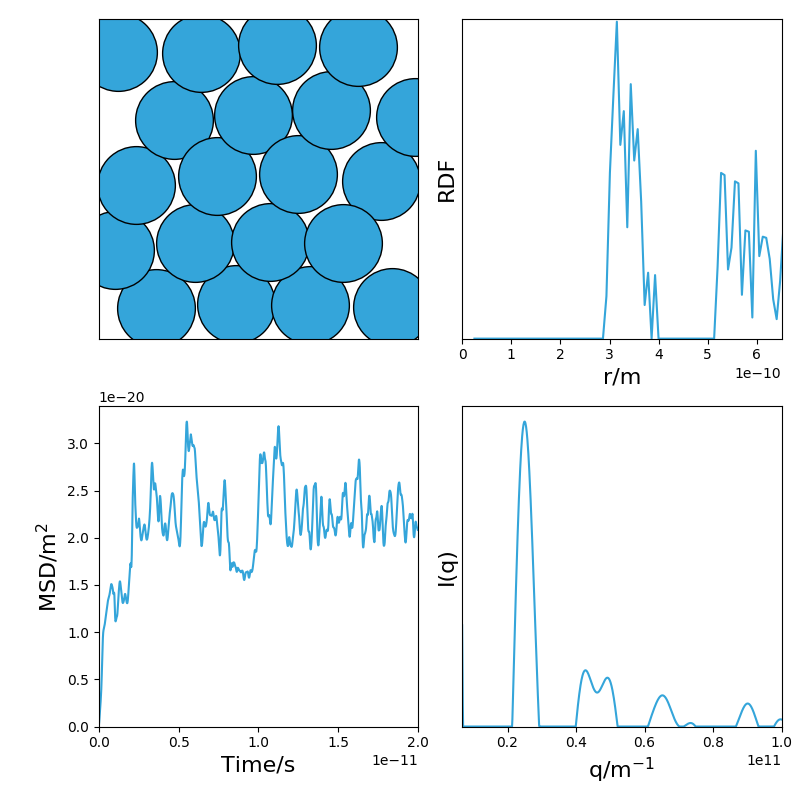

In [18]:
sim = md_simulation(20, 400, 13, 2000, sample.Scattering)